In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Shrey371/Elastic-Net/main/database.csv')
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [4]:
len(data.index)

23412

In [6]:
data.describe(include='all')

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
count,23412,23412,23412.000000,23412.000000,23412,23412.000000,4461.000000,7097.000000,23412.000000,23409,...,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000,23412,23412,23412,23412,23412
unique,12401,20472,NaN,NaN,4,NaN,NaN,NaN,NaN,10,...,NaN,NaN,NaN,NaN,NaN,23412,13,48,24,2
top,03/11/2011,02:56:58,NaN,NaN,Earthquake,NaN,NaN,NaN,NaN,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,US,US,US,Reviewed
freq,128,5,NaN,NaN,23232,NaN,NaN,NaN,NaN,7722,...,NaN,NaN,NaN,NaN,NaN,1,20630,20350,10458,20773
mean,NaN,NaN,1.679033,39.639961,NaN,70.767911,4.993115,275.364098,5.882531,NaN,...,48.944618,44.163532,3.992660,7.662759,1.022784,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,30.113183,125.511959,NaN,122.651898,4.875184,162.141631,0.423066,NaN,...,62.943106,32.141486,5.377262,10.430396,0.188545,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,-77.080000,-179.997000,NaN,-1.100000,0.000000,0.000000,5.500000,NaN,...,0.000000,0.000000,0.004505,0.085000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,-18.653000,-76.349750,NaN,14.522500,1.800000,146.000000,5.600000,NaN,...,10.000000,24.100000,0.968750,5.300000,0.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,-3.568500,103.982000,NaN,33.000000,3.500000,255.000000,5.700000,NaN,...,28.000000,36.000000,2.319500,6.700000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,26.190750,145.026250,NaN,54.000000,6.300000,384.000000,6.000000,NaN,...,66.000000,54.000000,4.724500,8.100000,1.130000,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [15]:
data.nunique(axis=0)

Date                          12401
Time                          20472
Latitude                      20676
Longitude                     21474
Type                              4
Depth                          3485
Depth Error                     297
Depth Seismic Stations          736
Magnitude                        64
Magnitude Type                   10
Magnitude Error                 100
Magnitude Seismic Stations      246
Azimuthal Gap                  1109
Horizontal Distance            1448
Horizontal Error                186
Root Mean Square                190
ID                            23412
Source                           13
Location Source                  48
Magnitude Source                 24
Status                            2
dtype: int64

In [16]:
data.columns.values

array(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth',
       'Depth Error', 'Depth Seismic Stations', 'Magnitude',
       'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations',
       'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error',
       'Root Mean Square', 'ID', 'Source', 'Location Source',
       'Magnitude Source', 'Status'], dtype=object)

In [21]:
# DROPPING DATE, TIME, LATITUDE, LONGITUDE, ID ----> HIGH CARDINALITY

# DROPPING Depth Error, Depth Seismic Stations, Magnitude Error, Magnitude Seismic Stations, Azimuthal Gap, Horizontal Distance, Horizontal Error, Root Mean Square
# ----> DUE TO MORE THAN 30% MISSING VALUES


data_cleaned = data.drop(['Date', 'Time', 'Latitude', 'Longitude','Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 
                          'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID'], axis=1)

In [23]:
data_cleaned.isnull().sum()

Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [24]:
data_cleaned.nunique(axis=0)

Type                   4
Depth               3485
Magnitude             64
Magnitude Type        10
Source                13
Location Source       48
Magnitude Source      24
Status                 2
dtype: int64

In [25]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              23412 non-null  object 
 1   Depth             23412 non-null  float64
 2   Magnitude         23412 non-null  float64
 3   Magnitude Type    23409 non-null  object 
 4   Source            23412 non-null  object 
 5   Location Source   23412 non-null  object 
 6   Magnitude Source  23412 non-null  object 
 7   Status            23412 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.4+ MB


In [26]:
data_cleaned.Status.unique()

array(['Automatic', 'Reviewed'], dtype=object)

Text(0.5, 1.0, 'Status frequencies')

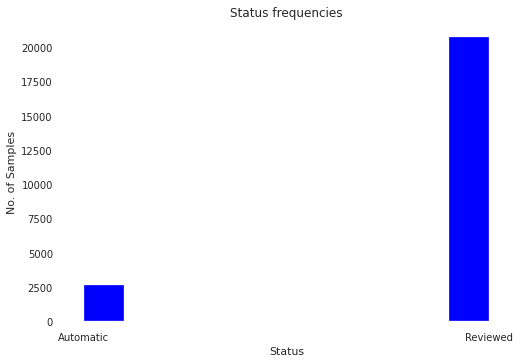

In [29]:
plt.hist(data_cleaned['Status'], color='blue')

plt.xlabel('Status')
plt.ylabel('No. of Samples')
plt.title('Status frequencies')

Text(0.5, 1.0, 'Type frequencies')

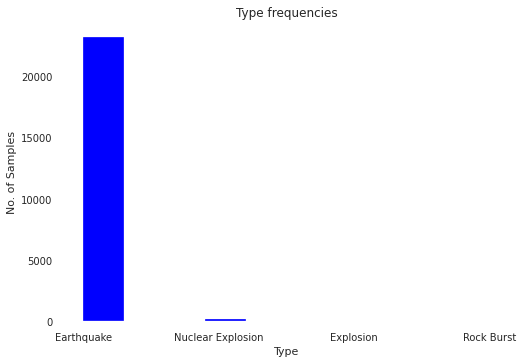

In [30]:
plt.hist(data_cleaned['Type'], color='blue')

plt.xlabel('Type')
plt.ylabel('No. of Samples')
plt.title('Type frequencies')

In [33]:
# DROPPING TYPE ----> ONLY 1 SIGNIFICANT VALUE

data_final = data_cleaned.drop(['Type'], axis=1)

In [34]:
data_final

,Depth,Magnitude,Magnitude Type,Source,Location Source,Magnitude Source,Status
0,131.60,6.0,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
1,80.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
2,20.00,6.2,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
3,15.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
4,15.00,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...
23407,12.30,5.6,ML,NN,NN,NN,Reviewed
23408,8.80,5.5,ML,NN,NN,NN,Reviewed
23409,10.00,5.9,MWW,US,US,US,Reviewed
23410,79.00,6.3,MWW,US,US,US,Reviewed


Text(0.5, 1.0, 'Depth frequencies')

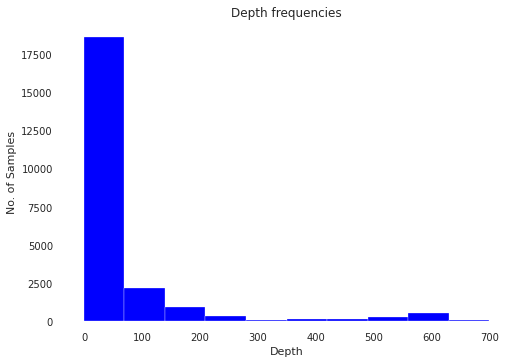

In [62]:
plt.hist(data_final['Depth'], color='blue')

plt.xlabel('Depth')
plt.ylabel('No. of Samples')
plt.title('Depth frequencies')

Text(0.5, 1.0, 'Magnitude frequencies')

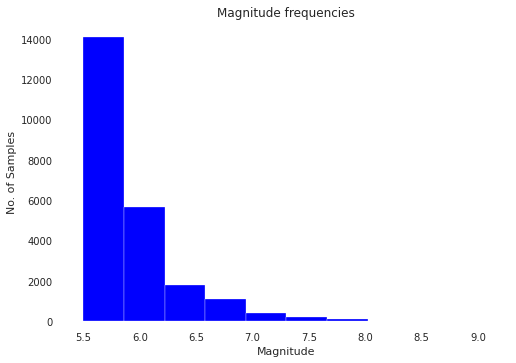

In [60]:
plt.hist(data_final['Magnitude'], color='blue')

plt.xlabel('Magnitude')
plt.ylabel('No. of Samples')
plt.title('Magnitude frequencies')

In [45]:
data_final.columns.values

array(['Depth', 'Magnitude', 'Magnitude Type', 'Source',
       'Location Source', 'Magnitude Source', 'Status'], dtype=object)

In [46]:
data_final['Status'] = data_final['Status'].replace(['Automatic', 'Reviewed'], ['0', '1'])
one_hot_encoded_data = pd.get_dummies(data_final, columns = ['Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'])
print(one_hot_encoded_data)

        Depth  Magnitude Status  Magnitude Type_MB  Magnitude Type_MD  \
0      131.60        6.0      0                  0                  0   
1       80.00        5.8      0                  0                  0   
2       20.00        6.2      0                  0                  0   
3       15.00        5.8      0                  0                  0   
4       15.00        5.8      0                  0                  0   
...       ...        ...    ...                ...                ...   
23407   12.30        5.6      1                  0                  0   
23408    8.80        5.5      1                  0                  0   
23409   10.00        5.9      1                  0                  0   
23410   79.00        6.3      1                  0                  0   
23411   11.94        5.5      1                  1                  0   

       Magnitude Type_MH  Magnitude Type_ML  Magnitude Type_MS  \
0                      0                  0              

In [38]:
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE

In [55]:
def smote_sampler(df, output, SEED=33):
     X = df.drop([output], axis=1)
     y = df[output]
     col_names = pd.concat([X, y], axis=1).columns.tolist()
     smt = SMOTE(random_state=SEED)
     X_smote, y_smote = smt.fit_resample(X, y)
    #  smote_array = np.concatenate([X_smote, y_smote], axis=1)
     df_ = pd.concat([X_smote, y_smote], axis=1)
     df_.columns = col_names
     smote_cols = df_.columns.tolist()
     org_int_cols = df.dtypes.index[df.dtypes == 'int64'].tolist()
     org_float_cols = df.dtypes.index[df.dtypes == 'float64'].tolist()
     try:
         for col in smote_cols:
             if col in org_float_cols:
                 df_[col] = df_[col].astype('float64')
             elif col in org_int_cols:
                 df_[col] = df_[col].astype('int64')
     except:
         raise ValueError
     return df_

In [56]:
data_resampled = smote_sampler(one_hot_encoded_data, 'Status')

Text(0.5, 1.0, 'Status frequencies')

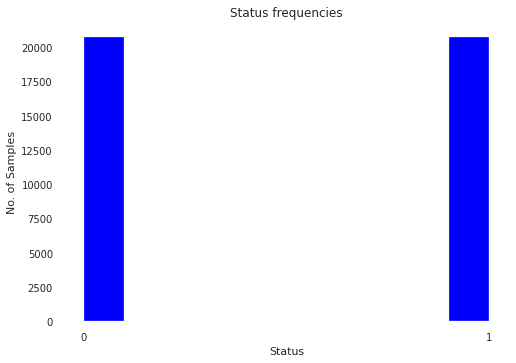

In [57]:
plt.hist(data_resampled['Status'], color='blue')

plt.xlabel('Status')
plt.ylabel('No. of Samples')
plt.title('Status frequencies')

In [64]:
# plt.hist(data_resampled['Magnitude'], color='blue')

# plt.xlabel('Magnitude')
# plt.ylabel('No. of Samples')
# plt.title('Magnitude frequencies')

In [65]:
# plt.hist(data_resampled['Depth'], color='blue')

# plt.xlabel('Depth')
# plt.ylabel('No. of Samples')
# plt.title('Depth frequencies')